# 5강 - 실전예제2 - 대형마트 상품판매량 예측하기 (월마트, 매장별로 내일 얼마나 팔릴까?)

## 작성자 : AISchool ( http://aischool.ai/ )

**Data source** : https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting

**Reference** : https://www.kaggle.com/avelinocaio/walmart-store-sales-forecasting

# 1. 라이브러리 및 데이터 로드

In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

plt.rcParams['font.family'] = 'Malgun Gothic'  # (Windows 용) 한글 출력을 위한 글꼴 설정
#plt.rcParams['font.family'] = 'AppleGothic'  # (MAC, 리눅스 용)
plt.rcParams['axes.unicode_minus'] = False    # 문자 - (마이너스) 정상 출력을 위한 코드

In [2]:
features = pd.read_csv('./walmart-recruiting-store-sales-forecasting/features.csv.zip')
train = pd.read_csv('./walmart-recruiting-store-sales-forecasting/train.csv.zip')
stores = pd.read_csv('./walmart-recruiting-store-sales-forecasting/stores.csv')
test = pd.read_csv('./walmart-recruiting-store-sales-forecasting/test.csv.zip')
sample_submission = pd.read_csv('./walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip')

# 2. Exploratory Data Analysis(EDA) & Data Cleansing

## feature.csv 데이터셋과 stores.csv 데이터셋을 merge해서 새로운 데이터셋(feat_sto)을 만듭니다. 이때 'Store' 컬럼을 키로 사용합니다.

> 'Date' 필드가 string(object) 타입으로 지정되어 있는 모습을 볼 수 있습니다. 우리는 이를 datetime 타입으로 변경할 수 있습니다.

## 'Date'로부터 Week와 Year 컬럼을 새로 추가합니다.

## train과 feat_sto, test와 feat_sto를 묶어서 train_detail, test_detail이라는 새로운 데이터 프레임을 생성합니다.

## 연도별 날짜별 판매량을 그래프로 살펴봅시다.

# 날짜별 판매량 평균값(Mean)과 중앙값(Median) 구해보기

## 위에서 볼 수 있듯이 평균값(mean)과 중앙값(median)이 매우 다른 모습을 볼 수 있습니다. 따라서 어떤 상점(store)/부서(department)는 다른 상점보다 훨씬 많이 판매한다는 사실을 알 수 있습니다.

# 상점(Store)와 부서(Department)별 평균 판매량(Average Sales)을 살펴봅시다.

## 상점별로 판매량이 다른 모습을 볼 수 있습니다.

## 또한 부서(Dept)별로 판매량이 다른 모습을 관찰할 수 있습니다.

# 상관 분석(Correlation Analysis) 수행해보기

## 일반적으로 Correlation을 다음과 같이 해석합니다.
1. **0** : 전혀 연관관계가 없습니다.
2. **0-0.3** : 약간 연관관계를 갖고 있습니다.
3. **0.3-0.7** : 중간정도의 연관관계를 갖고 있습니다.
4. **0.7-1** : 강한 상관관계를 갖고 있습니다.

## Markdown1~5과 Fuel_price는 주간 판매량(Weekly_Sales)와 큰 연관관계가 없는 모습을 볼 수 있습니다. 따라서 해당 Feature는 드롭합니다.

## Feature 더 자세히 분석하기

### 두가지 plot 함수를 만들어봅시다.
### 먼저 제한된 숫자를 가진 컬럼을 위한 discrete plot을 그립니다. discrete plot 같은 경우, boxplot과 stripplot을 이용해서 그래프를 그립니다.
### 연속된 값을 가진 컬럼을 위한 continuous plot을 그립니다.  cotinuous plot 같은 경우, regplot을 이용해서 그래프를 그립니다.

### Weekly_Sales 컬럼과 IsHoliday 컬럼의 상관관계 분석

### 공휴일 주간에 더욱 많은 판매량을 기록한 데이터들이 존재하는 모습을 볼 수 있습니다.

### Weekly_Sales 컬럼과 Type 컬럼의 상관관계 분석

## Type의 A > B > C 순으로 판매량이 많은 모습을 볼 수 있습니다.

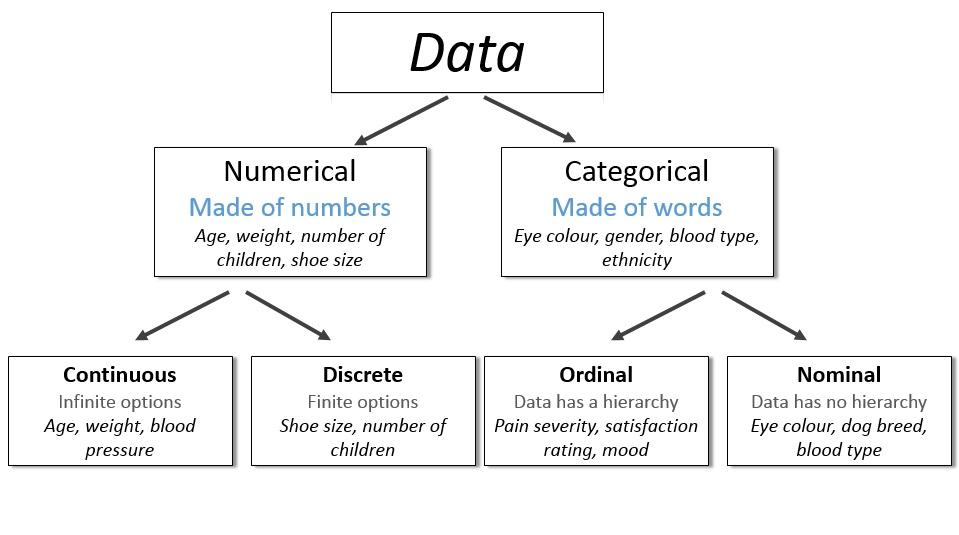

## 따라서 Type 컬럼을 Ordinal 형태로 변경합니다.

### Weekly_Sales 컬럼과 Temperature 컬럼의 상관관계 분석

## Temperatue는 판매량과 연관관계가 거의 없는 모습을 볼 수 있습니다. 따라서 해당 Feature를 drop합니다.

### Weekly_Sales 컬럼과 CPI 컬럼의 상관관계 분석

## CPI 또한 판매량과 연관관계가 거의 없는 모습을 볼 수 있습니다. 따라서 해당 Feature를 drop합니다.

### Weekly_Sales 컬럼과 Unemployment 컬럼의 상관관계 분석

## Unemployment 또한 판매량과 연관관계가 거의 없는 모습을 볼 수 있습니다. 따라서 해당 Feature를 drop합니다.

### Weekly_Sales 컬럼과 Size 컬럼의 상관관계 분석

## Size는 판매량과 연관관계를 가지고 있는 모습을 볼 수 있습니다.

# 3. 머신러닝을 이용한 예측 모델 생성

> 아래 그림에서 볼 수 있듯이 공휴일이 포함된 주에 5의 가중치를 가지고 에러를 측정합니다.

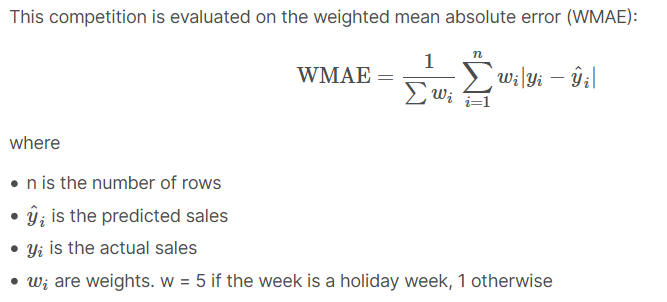

## 따라서 WMAE 손실함수를 다음과 같이 정의합니다.

## 분류기로 RandomForesRegressor를 활용합니다. 

## 트레이닝 데이터를 준비합니다.

## Random Forest Estimator를 선언하고 학습 및 예측을 진행합니다.

## 트레이닝 에러를 측정합니다.

### 테스트 데이터에 대한 예측 수행하기(Predictions)

# 4. 대회제출용 csv 데이터 만들기(Submission)

# 연습문제 1
1. LinearRegression을 이용한 Estimator를 만들어서 학습 및 예측을 수행해보고, RandomForestRegressor를 이용한 학습 및 예측 모델과 성능을 비교해봅시다.
2. *n_estimators*와 *max_depth*는 RandomForestRegressor의 하이퍼 파라미터로써 RandomForest 모델의 성능에 영향을 끼칩니다. RandomForestRegressor를 선언할때 n_estimators와 max_depth값을 바꾼뒤 다시 학습을 진행한뒤 학습한 모델의 WMAE를 측정해보세요.(e.g. RandomForestRegressor(n_estimators=50, max_depth=30)